# FE_1, 베이스 데이터 + Historical 데이터

* 히스토리 데이터중 train, test 구분 후 EDA와 함께 FE를 진행할 계획입니다.

## 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import gc

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 100)

## 데이터 로드

In [4]:
path = './data/'

In [5]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
history = pd.read_csv(path + 'historical_transactions.csv')
# new_history = pd.read_csv(path + 'new_merchant_transactions.csv')
# merchant = pd.read_csv(path + 'merchants.csv')

## history 데이터를 train, test card_id로 분리하기

In [6]:
# train_idx = train.card_id.unique()
# test_idx = test.card_id.unique()

In [7]:
# for card_id in train_idx[:100]:
#     history[history.card_id == card_id].sort_values('purchase_date')

* 1) 시도 했으나, 100개의 card_id를 historical에서 구분했을 때 2분 43초, train data의 총 card_id 개수는 약 20만개, 대략 3.7일정도 걸림
* 2) 멀티프로세싱으로 성능 개선을 시도했으나, 프로세스간 메모리 공유가 불가능 해 램 교착상태 발생
* 3) 멀티스레딩으로 메모리 공유 문제를 해결하려 했으나, 파이썬 언어 철학 특성상 성능상 이점을 얻기 힘들어 1번 문제 발생

 * 데이터를 보고 EDA를 진행 후 FE를 진행하려했지만, 위와 같은 문제 때문에, 일반 케글 커널처럼 최대한 많은 FE 진행 후 EDA를 진행 (MLE 같군요 ...ㅠ)

## Sample EDA

In [12]:
history = history.sort_values(['card_id', 'purchase_date'])

In [177]:
col_class_dic = {
    'authorized_flag':sorted(list(history['authorized_flag'].value_counts().index)),
    'category_1':sorted(list(history['category_1'].value_counts().index)),
    'installments':sorted(list(history['installments'].value_counts().index)),
    'category_3':sorted(list(history['category_3'].value_counts().index)),
    'month_lag':sorted(list(history['month_lag'].value_counts().index)),
    'category_2':sorted(list(history['category_2'].value_counts().index))
}

In [178]:
def get_value_cnt(data, col):
    dic = {}
    
    temp = data[col].value_counts().to_dict()
    for cls in col_class_dic[col]:
        try:
            dic[str(cls)] = temp[cls]
        except:
            dic[str(cls)] = 0
    
    return list(dic.keys()), list(dic.values())

In [179]:
def sample_eda(card_id):
    temp = history[history.card_id == card_id]
    fig = plt.figure(figsize = (16,16))

    ax1 = plt.subplot2grid((3,3), (0,0), rowspan = 1, colspan = 1)
    ax2 = plt.subplot2grid((3,3), (0,1), rowspan = 1, colspan = 1)
    ax3 = plt.subplot2grid((3,3), (0,2), rowspan = 1, colspan = 1)
    ax4 = plt.subplot2grid((3,3), (1,0), rowspan = 1, colspan = 1)
    ax5 = plt.subplot2grid((3,3), (1,1), rowspan = 1, colspan = 1)
    ax6 = plt.subplot2grid((3,3), (1,2), rowspan = 1, colspan = 1)
    ax7 = plt.subplot2grid((3,3), (2,0), rowspan = 1, colspan = 3)

    # authorized_flag
    col = 'authorized_flag'
    idx, val = get_value_cnt(temp, col)
    ax1.bar(x=idx, height=val, width=0.5, color=['r','b'])
    ax1.set_xlabel(col)

    # category_1
    col = 'category_1'
    idx, val = get_value_cnt(temp, col)
    ax2.bar(x=idx, height=val, width=0.5, color=['r','b'])
    ax2.set_xlabel(col)

    # installments
    col = 'installments'
    idx, val = get_value_cnt(temp, col)
    ax3.bar(x=idx, height=val, width=0.5, color=['r','b'])
    ax3.set_xlabel(col)

    # category_3
    col = 'category_3'
    idx, val = get_value_cnt(temp, col)
    ax4.bar(x=idx, height=val, width=0.5, color=['r','b','g'])
    ax4.set_xlabel(col)

    # month_lag
    col = 'month_lag'
    idx, val = get_value_cnt(temp, col)
    ax5.bar(x=idx, height=val, width=0.5, color=['r','b'])
    ax5.set_xlabel(col)


    # category_2
    col = 'category_2'
    idx, val = get_value_cnt(temp, col)
    ax6.bar(x=idx, height=val, width=0.5, color=['r','b','g','y','c'])
    ax6.set_xlabel(col)

    sns.distplot(temp.purchase_amount)

    plt.show()

    print('\n=======================================================================================================\n')
    print("******************** 거래량 ********************")
    print(len(temp), '\n')

    print('******************** city_id ********************')
    print("방문한 도시 개수: {} \n".format(len(temp.city_id.unique())))
    print(temp.city_id.value_counts(), '\n')

    print('******************** merchant_category_id ********************')
    print("상인 카테고리 개수: {} \n".format(len(temp.merchant_category_id.unique())))
    print(temp.merchant_category_id.value_counts()[:5], '\n')


In [182]:
train = train.sort_values('target')

In [220]:
card_ids = train.iloc[train.index[::350]].sort_values('target').card_id.values

In [222]:
def sample_eda_with_target(card_id):
    print("================================ target =====================================")
    print("target: {}".format(train[train.card_id == card_id].target.values))
    sample_eda(card_id)


================================ target =====================================
target: [-33.21928095]


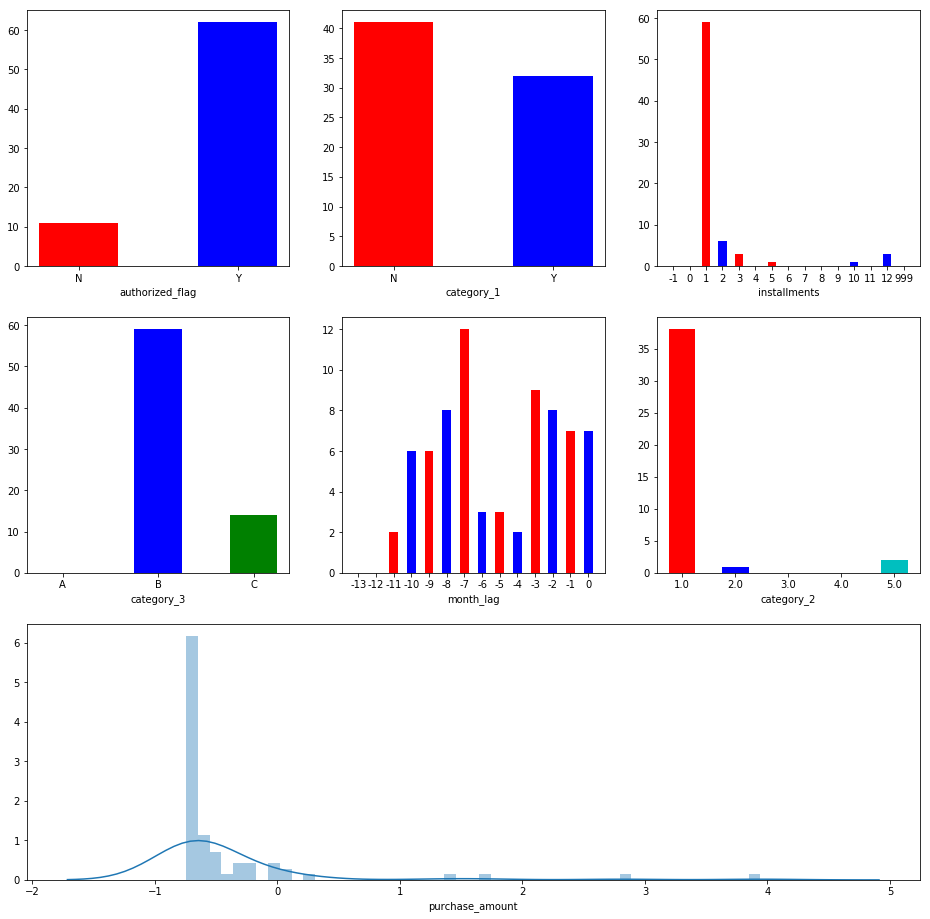



******************** 거래량 ********************
73 

******************** city_id ********************
방문한 도시 개수: 7 

-1      32
 111    16
 233    14
 69      4
 140     4
 162     2
 344     1
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 30 

879    8
755    6
839    5
705    4
80     4
Name: merchant_category_id, dtype: int64 



In [223]:
sample_eda_with_target(card_ids[0])

================================ target =====================================
target: [-33.21928095]


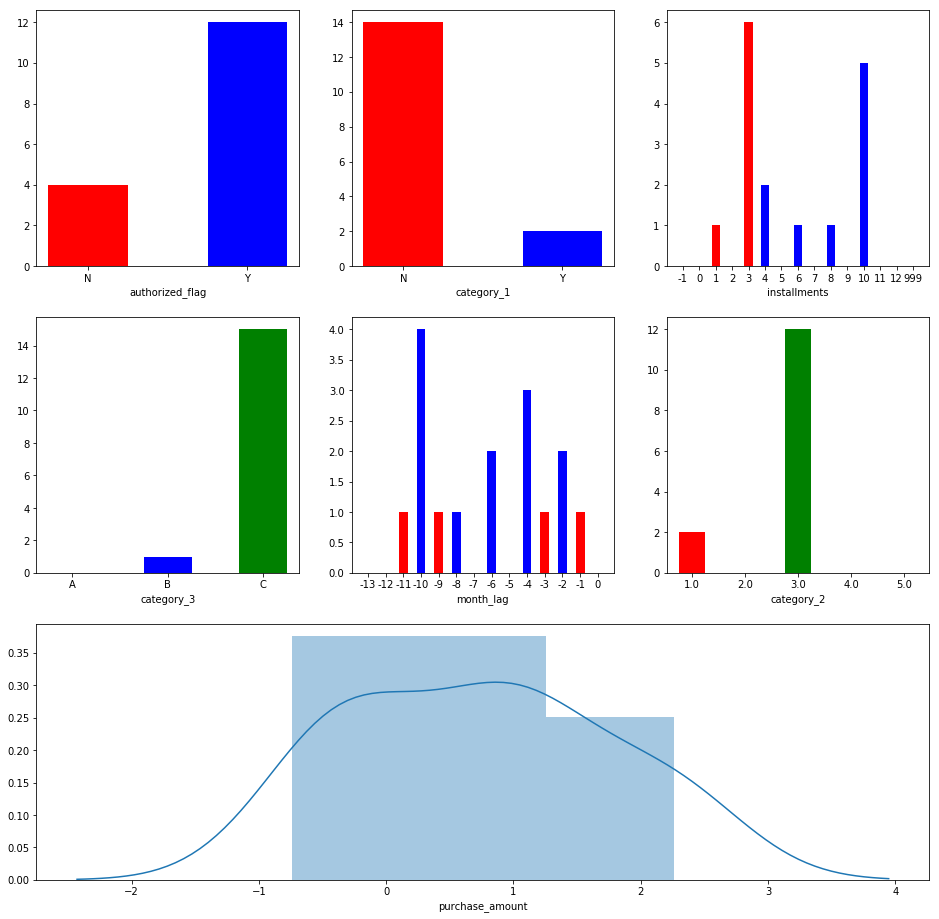



******************** 거래량 ********************
16 

******************** city_id ********************
방문한 도시 개수: 4 

 87     12
-1       2
 69      1
 291     1
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 10 

670    4
879    2
422    2
544    2
319    1
Name: merchant_category_id, dtype: int64 



In [224]:
sample_eda_with_target(card_ids[1])

================================ target =====================================
target: [-33.21928095]


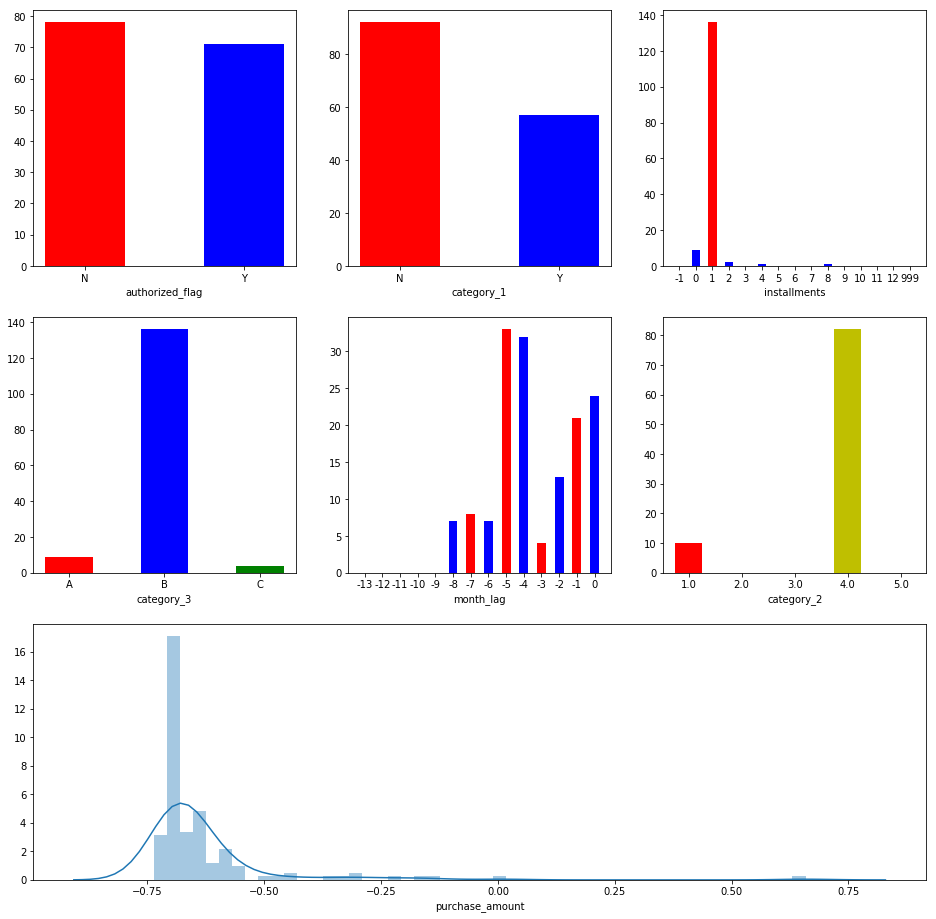



******************** 거래량 ********************
149 

******************** city_id ********************
방문한 도시 개수: 4 

 107    81
-1      57
 69     10
 126     1
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 11 

755    57
705    38
489    17
683    14
879    10
Name: merchant_category_id, dtype: int64 



In [225]:
sample_eda_with_target(card_ids[2])

================================ target =====================================
target: [-33.21928095]


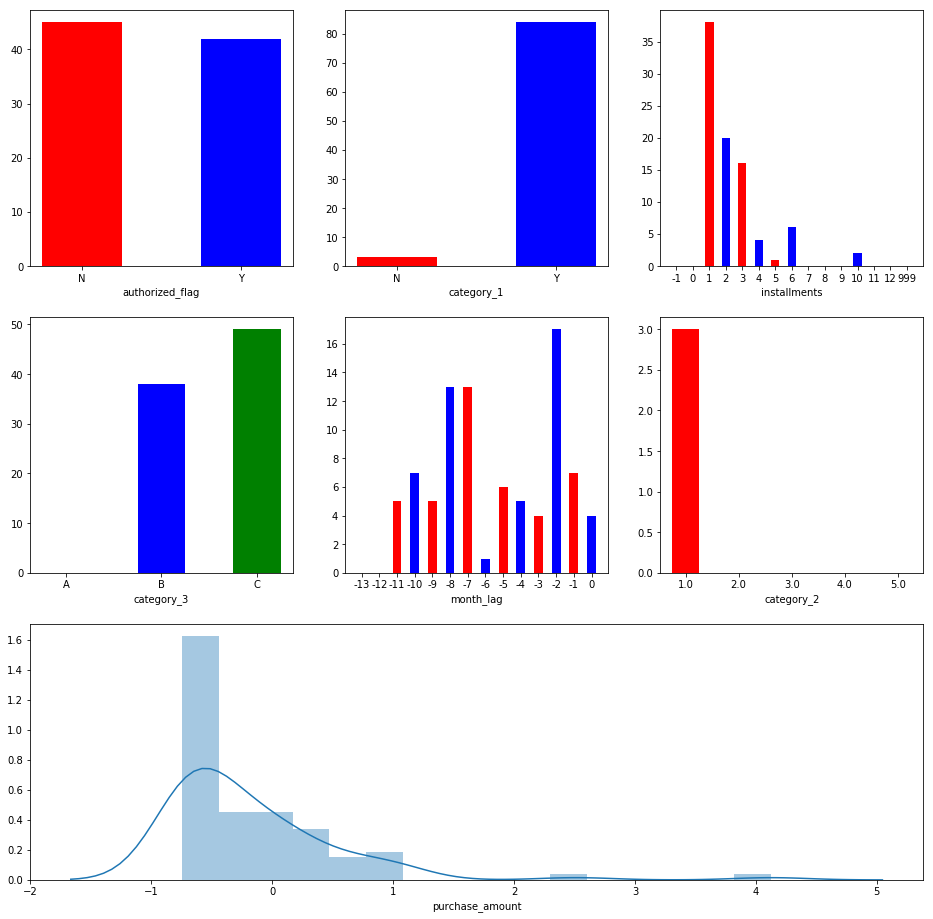



******************** 거래량 ********************
87 

******************** city_id ********************
방문한 도시 개수: 3 

-1      84
 283     2
 88      1
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 14 

661    25
206    24
879    12
491     7
210     5
Name: merchant_category_id, dtype: int64 



In [226]:
sample_eda_with_target(card_ids[3])

================================ target =====================================
target: [-33.21928095]


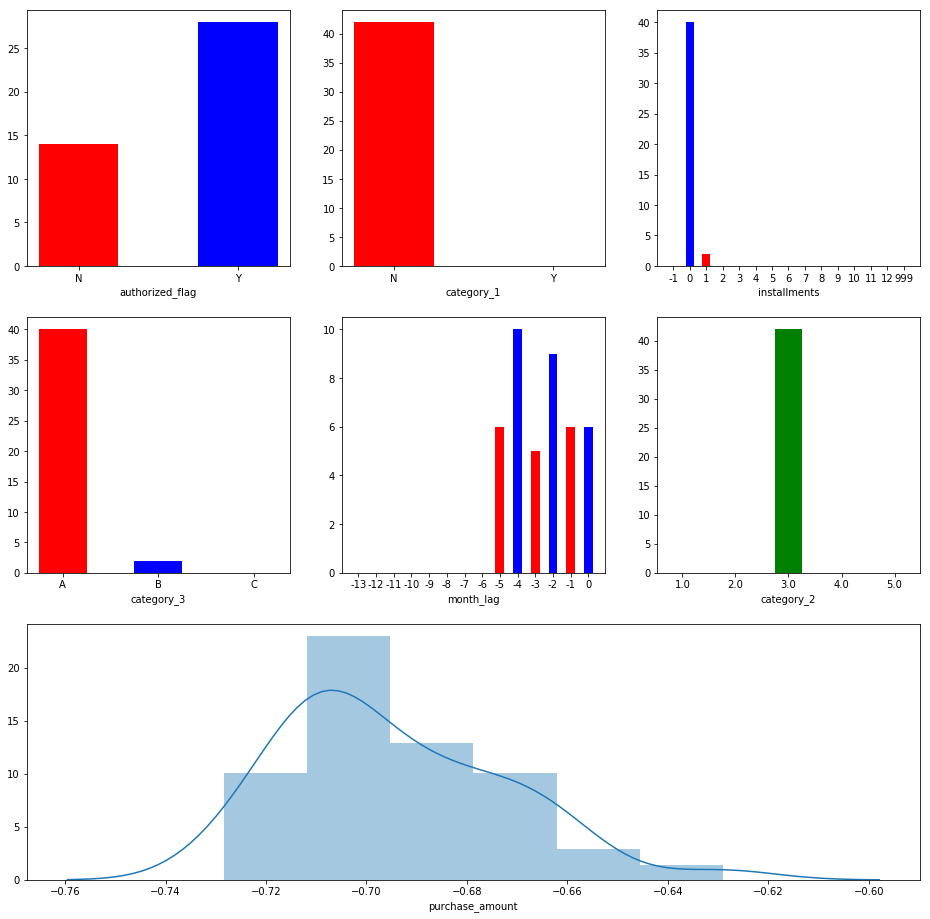



******************** 거래량 ********************
42 

******************** city_id ********************
방문한 도시 개수: 1 

322    42
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 8 

705    29
367     4
683     3
544     2
434     1
Name: merchant_category_id, dtype: int64 



In [227]:
sample_eda_with_target(card_ids[4])

================================ target =====================================
target: [-33.21928095]


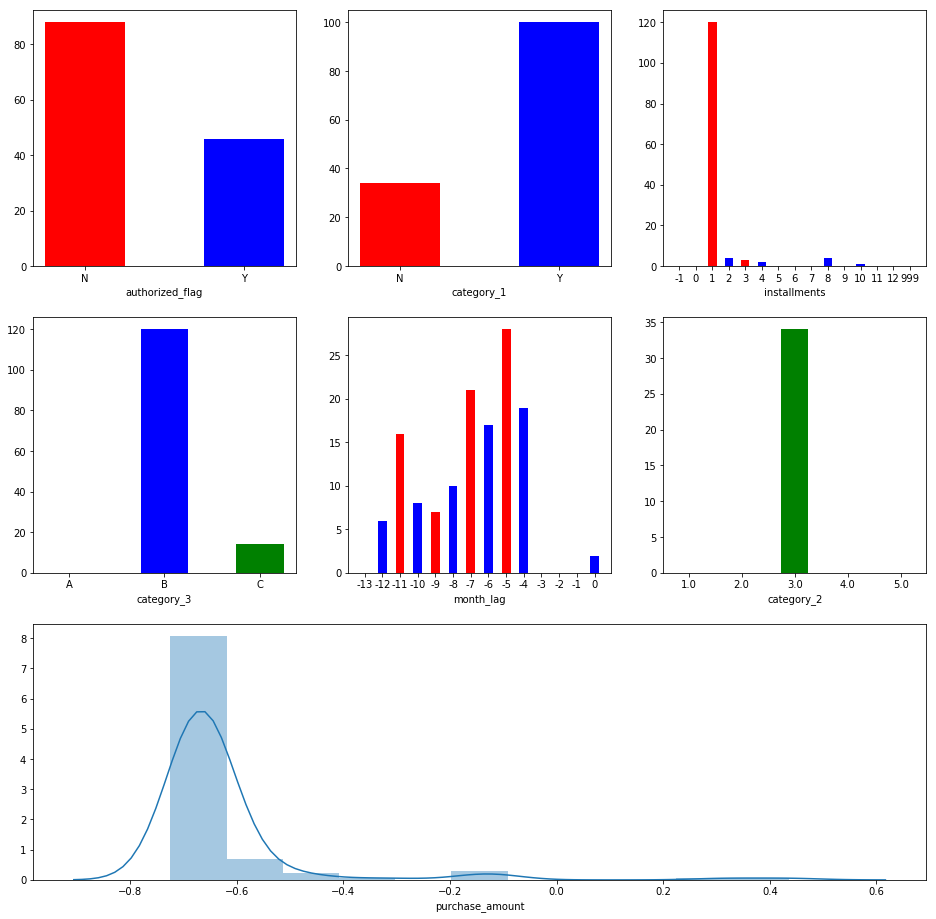



******************** 거래량 ********************
134 

******************** city_id ********************
방문한 도시 개수: 4 

-1      100
 46      31
 30       2
 137      1
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 19 

755    85
307     9
451     7
705     6
690     6
Name: merchant_category_id, dtype: int64 



In [228]:
sample_eda_with_target(card_ids[5])

================================ target =====================================
target: [-8.91901068]


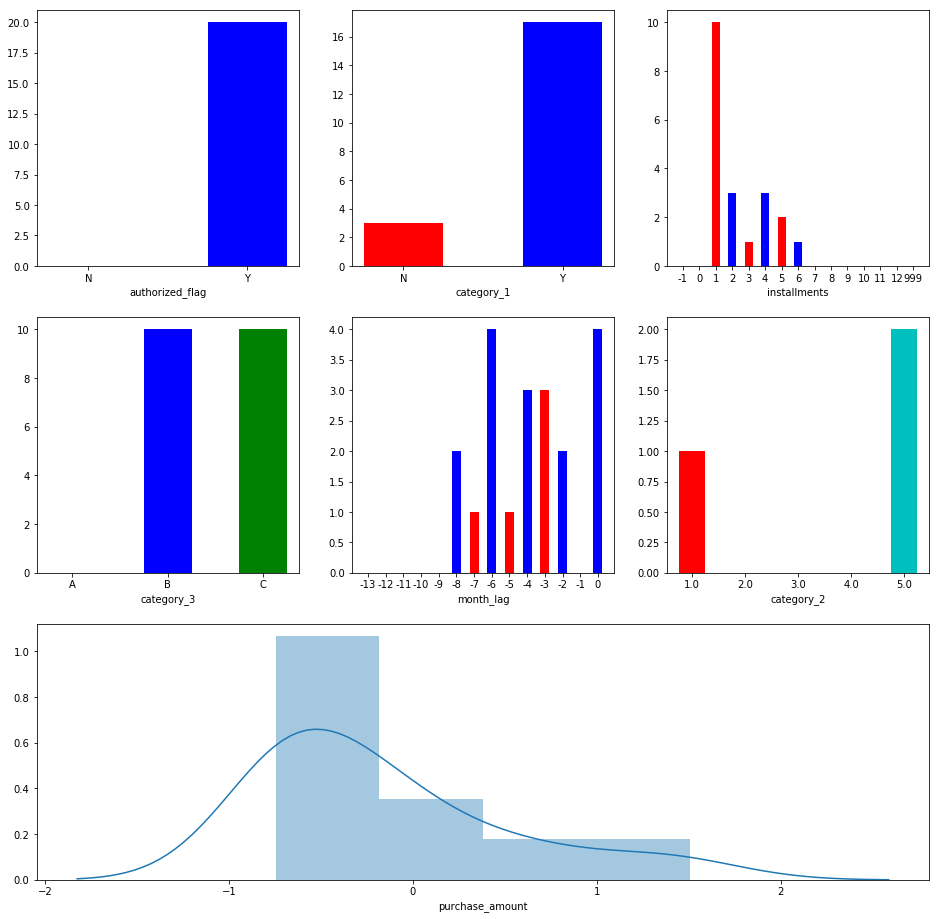



******************** 거래량 ********************
20 

******************** city_id ********************
방문한 도시 개수: 3 

-1      17
 53      2
 214     1
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 10 

879    6
317    4
491    2
210    2
665    1
Name: merchant_category_id, dtype: int64 



In [229]:
sample_eda_with_target(card_ids[6])

================================ target =====================================
target: [-5.86619365]


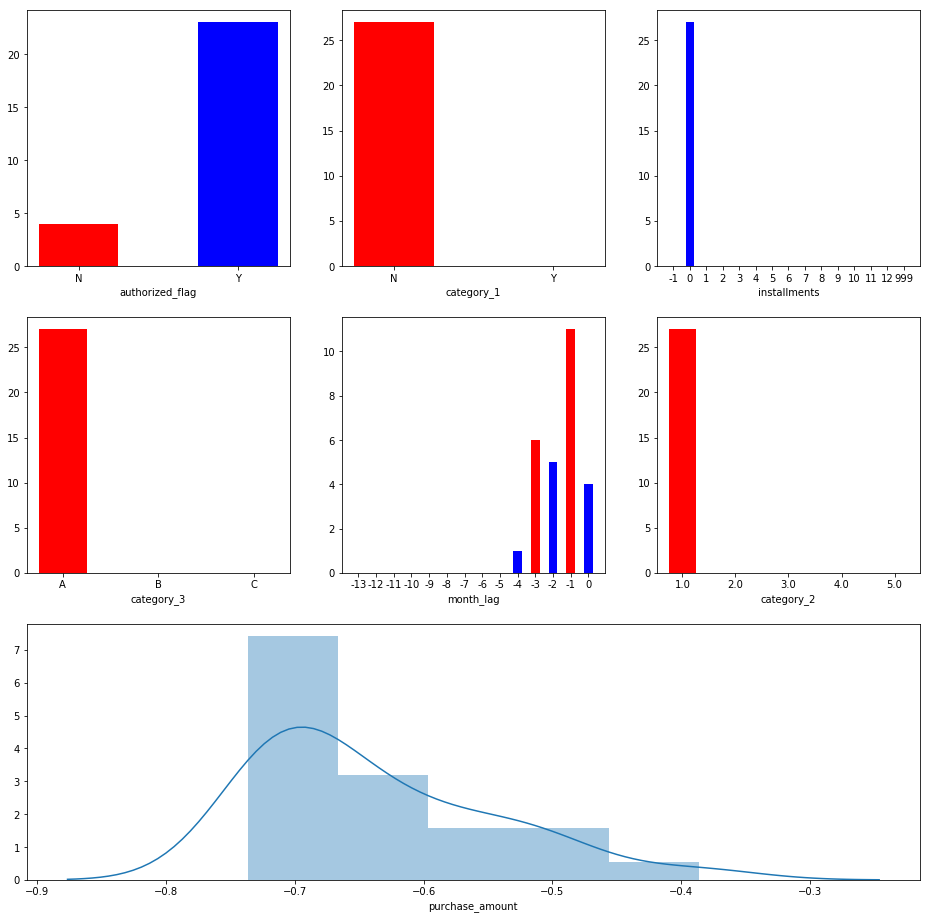



******************** 거래량 ********************
27 

******************** city_id ********************
방문한 도시 개수: 2 

308    25
69      2
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 13 

419    6
411    4
222    3
560    3
879    2
Name: merchant_category_id, dtype: int64 



In [230]:
sample_eda_with_target(card_ids[7])

================================ target =====================================
target: [-5.11532875]


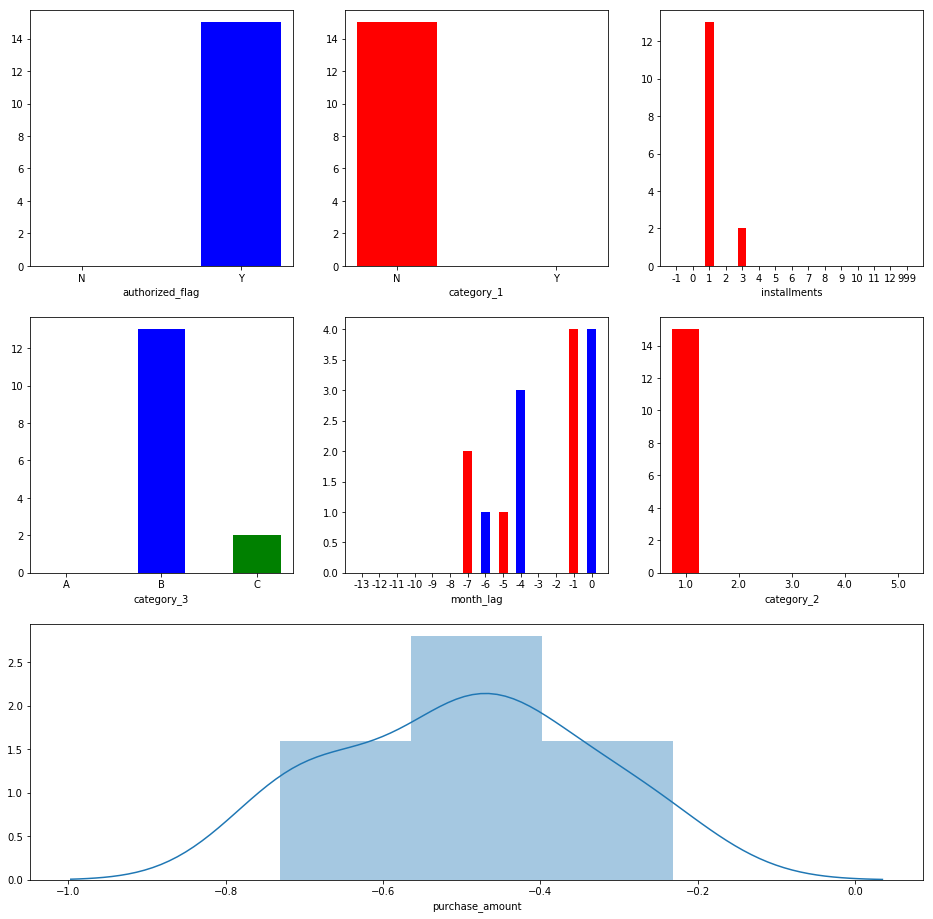



******************** 거래량 ********************
15 

******************** city_id ********************
방문한 도시 개수: 3 

88     12
125     2
69      1
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 11 

367    2
108    2
278    2
705    2
45     1
Name: merchant_category_id, dtype: int64 



In [231]:
sample_eda_with_target(card_ids[8])

================================ target =====================================
target: [5.21408794]


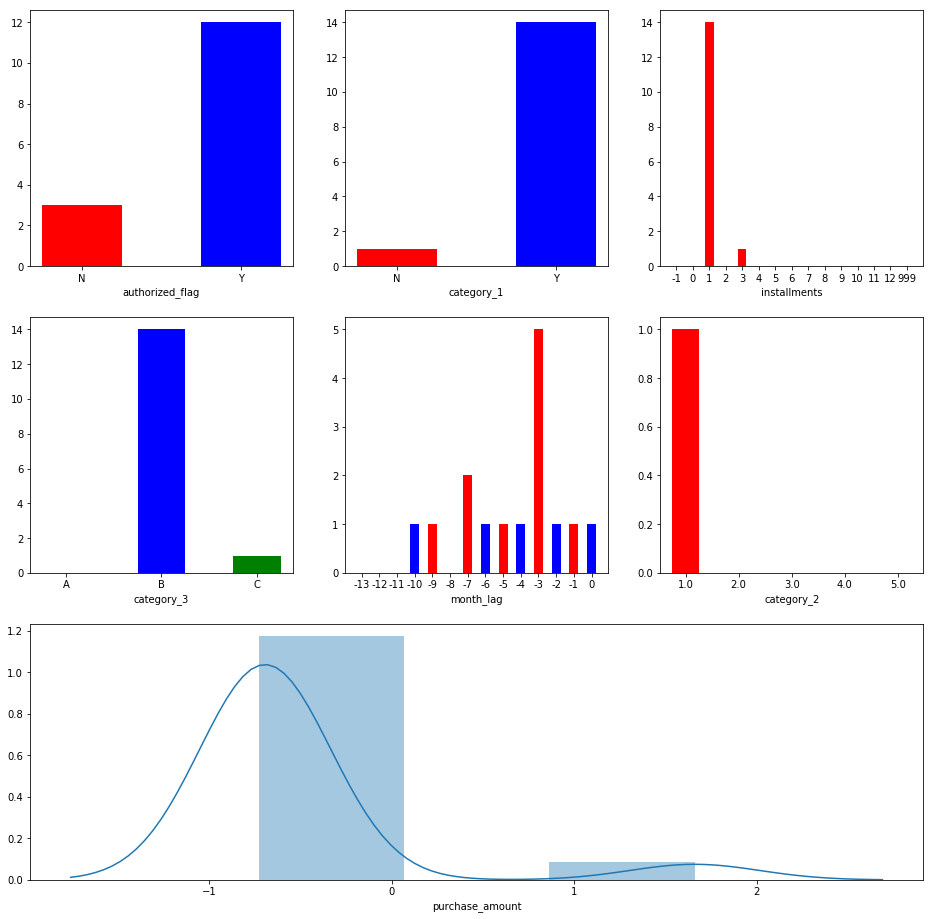



******************** 거래량 ********************
15 

******************** city_id ********************
방문한 도시 개수: 2 

-1      14
 248     1
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 3 

755    13
879     1
774     1
Name: merchant_category_id, dtype: int64 



In [232]:
sample_eda_with_target(card_ids[-2])

================================ target =====================================
target: [7.97634141]


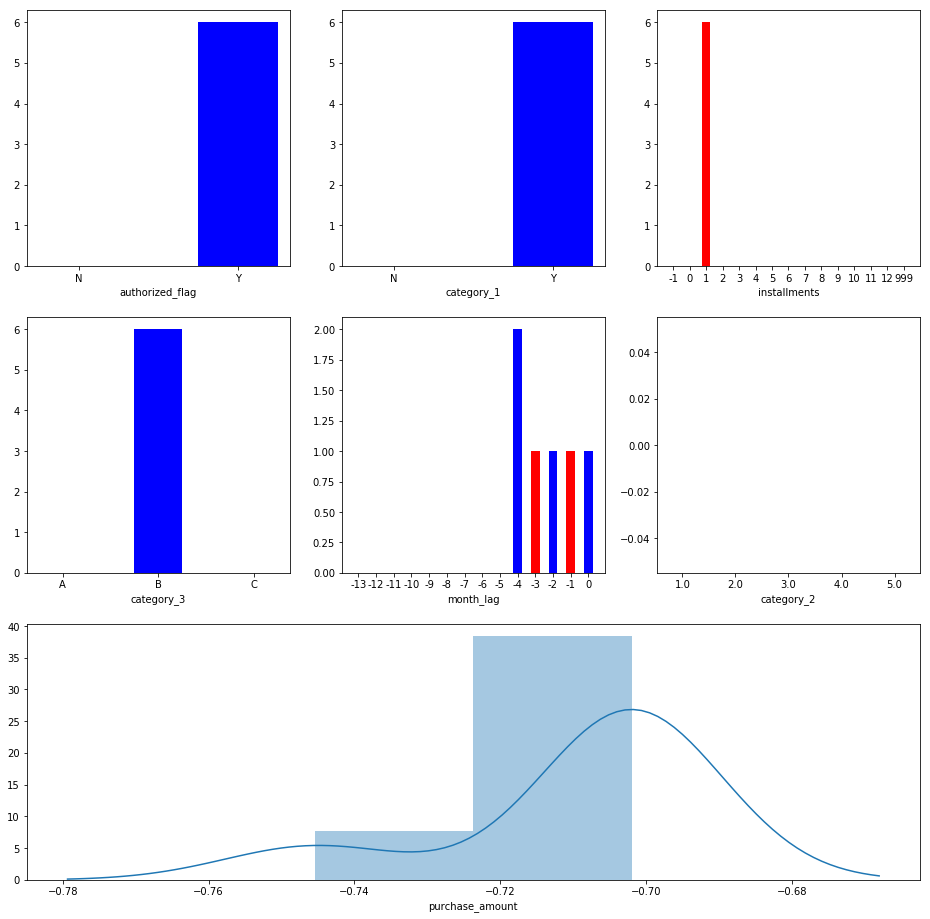



******************** 거래량 ********************
6 

******************** city_id ********************
방문한 도시 개수: 1 

-1    6
Name: city_id, dtype: int64 

******************** merchant_category_id ********************
상인 카테고리 개수: 1 

661    6
Name: merchant_category_id, dtype: int64 



In [233]:
sample_eda_with_target(card_ids[-1])

## Feature Engineering

### 전처리

#### 정렬

In [6]:
history = history.sort_values(['card_id', 'purchase_date'])

#### 널 채우기

In [7]:
history.category_2.fillna("NULL", inplace=True)
history.category_3.fillna("NULL", inplace=True)
history.merchant_id.fillna("NULL", inplace=True)

In [8]:
history['category_2'] = history['category_2'].astype('str')

#### 사전만들기

In [9]:
col_class_dic = {
    'authorized_flag':sorted(list(history['authorized_flag'].value_counts().index)),
    'category_1':sorted(list(history['category_1'].value_counts().index)),
    'installments':sorted(list(history['installments'].value_counts().index)),
    'category_3':sorted(list(history['category_3'].value_counts().index)),
    'month_lag':sorted(list(history['month_lag'].value_counts().index)),
    'category_2':sorted(list(history['category_2'].value_counts().index))
}

#### get value count !

In [10]:
def get_value_cnt(data, col):
    dic = {}
    
    temp = data[col].value_counts().to_dict()
    for cls in col_class_dic[col]:
        try:
            dic[str(cls)] = temp[cls]
        except:
            dic[str(cls)] = 0
    
    return dic

#### purchase date 전처리!

In [11]:
history['purchase_date'] = pd.to_datetime(history['purchase_date'])

In [12]:
history['year'] = history['purchase_date'].dt.year
history['weekofyear'] = history['purchase_date'].dt.weekofyear
history['month'] = history['purchase_date'].dt.month
history['dayofweek'] = history['purchase_date'].dt.dayofweek
history['weekend'] = (history.purchase_date.dt.weekday >=5).astype(int)
history['hour'] = history['purchase_date'].dt.hour

### 카드 버킷에 관련된 통계량

* 총 개수

In [15]:
history_fe = pd.DataFrame(history.card_id.unique(), columns=['card_id']).set_index('card_id')

In [16]:
history_fe['total_size'] = history.groupby('card_id').agg('size')

### 각 컬럼 별 엔지니어링

#### authorized_flag
* Y 개수
* N 개수
* 전체 대비 Y 비율
* 전체 대비 N 비율

In [17]:
def authorized_flag_cnt(data):
    return get_value_cnt(data.to_frame(), "authorized_flag")

#### category_1
* Y 개수
* N 개수
* 전체 대비 Y 비율
* 전체 대비 N 비율

In [18]:
def category_1_cnt(data):
    return get_value_cnt(data.to_frame(), "category_1")

#### installments
* -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 999 개수
* 합, 평균, 분산, min, 25%, 50%, 75%, max

In [19]:
def installments_cnt(data):
    return get_value_cnt(data.to_frame(), 'installments')

In [20]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#### category_3
* A, B, C, NULL 개수
* 전체 대비 A 비율
* 전체 대비 B 비율
* 전체 대비 NULL 비율

In [21]:
def category_3_cnt(data):
    return get_value_cnt(data.to_frame(), 'category_3')

#### month_lag
* 각각의 개수
* 각각의 비율

In [22]:
def month_lag_cnt(data):
    return get_value_cnt(data.to_frame(), 'month_lag')

#### purchase_amount
* 합, 평균, 분산, min, 25%, 50%, 75%, max
* 금액이 550 이상 인 것의 개수

In [23]:
def purchase_amount_over_550(data):
    return len(data[data > 550])

#### purchase_date
* year, week of year, month, day of week, weekend, hour nunique
* duration (last - first)

In [24]:
def purchase_date_duration(data):
    start = data.iloc[0]
    last = data.iloc[-1]
    return int((last - start).total_seconds())

#### weekend
* 합, 평균

#### category_2
* 각각의 개수
* 각각의 비율

In [25]:
def category_2_cnt(data):
    return get_value_cnt(data.to_frame(), 'category_2')

#### city_id & merchant_category_id & merchant_id & state_id & subsector_id & year & weeofyear & month & dayofweek & hour
* nunique

In [26]:
nuniques = ['month','hour','weekofyear','dayofweek','year','subsector_id','merchant_id','merchant_category_id' ,'city_id', "state_id"]

#### Agg Function

In [27]:
aggs = {}

In [28]:
for col in nuniques:
    aggs[col] = ['nunique']

In [29]:
aggs["authorized_flag"] = [authorized_flag_cnt]
aggs["category_1"] = [category_1_cnt]
aggs["installments"] = [installments_cnt, "sum", "mean", "std", "min", "max", percentile(25), percentile(50), percentile(75)]
aggs["category_3"] = [category_3_cnt]
aggs["month_lag"] = [month_lag_cnt]
aggs["purchase_amount"] = ["sum", "mean", "std", "min", "max", percentile(25), percentile(50), percentile(75), purchase_amount_over_550]
aggs["purchase_date"] = [purchase_date_duration]
aggs["weekend"] = ["sum", "mean"]
aggs["category_2"] = [category_2_cnt]

##### get column name

In [30]:
def get_new_columns(name,aggs):
    result = []
    for key in aggs.keys():
        for agg in aggs[key]:
            if callable(agg):
                agg = agg.__name__
            
            result.append(name + '_' + key + '_' + agg)
                
    return result

In [31]:
cols = get_new_columns("history", aggs)

##### get engineered feature

In [36]:
temp = history.groupby('card_id').agg(aggs)

In [37]:
temp.columns = cols

In [39]:
temp.to_csv('./data/temp.csv')

In [40]:
tt = pd.read_csv('./data/temp.csv')